In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

for dirname, _, filenames in os.walk('/content/drive/MyDrive/DAVLAB  ASSIGNMNET DATA FOLDERS/ARC'):
    print(dirname)

from pathlib import Path

/content/drive/MyDrive/DAVLAB  ASSIGNMNET DATA FOLDERS/ARC
/content/drive/MyDrive/DAVLAB  ASSIGNMNET DATA FOLDERS/ARC/training
/content/drive/MyDrive/DAVLAB  ASSIGNMNET DATA FOLDERS/ARC/evaluation
/content/drive/MyDrive/DAVLAB  ASSIGNMNET DATA FOLDERS/ARC/test


In [ ]:
data_path = Path('/content/drive/MyDrive/DAVLAB  ASSIGNMNET DATA FOLDERS/ARC')
training_path = data_path /'training'
evaluation_path = data_path /'evaluation'
test_path = data_path /'test'

training_tasks = sorted(os.listdir(training_path))
evaluation_tasks = sorted(os.listdir(evaluation_path))
test_tasks = sorted(os.listdir(test_path))
print(len(training_tasks), len(evaluation_tasks), len(test_tasks))

400 409 100


In [ ]:
evaluation_tasks

['00576224.json',
 '009d5c81.json',
 '00dbd492.json',
 '03560426.json',
 '05a7bcf2.json',
 '0607ce86.json',
 '0692e18c.json',
 '070dd51e.json',
 '08573cc6.json',
 '0934a4d8.json',
 '09c534e7.json',
 '0a1d4ef5.json',
 '0a2355a6.json',
 '0b17323b.json',
 '0bb8deee.json',
 '0becf7df.json',
 '0c786b71.json',
 '0c9aba6e.json',
 '0d87d2a6.json',
 '0e671a1a.json',
 '0f63c0b9.json',
 '103eff5b.json',
 '11e1fe23.json',
 '12422b43.json',
 '12997ef3.json',
 '12eac192.json',
 '136b0064.json',
 '13713586.json',
 '137f0df0.json',
 '140c817e.json',
 '14754a24.json',
 '15113be4.json',
 '15663ba9.json',
 '15696249.json',
 '16b78196.json',
 '17b80ad2.json',
 '17cae0c1.json',
 '18419cfa.json',
 '184a9768.json',
 '195ba7dc.json',
 '1990f7a8.json',
 '19bb5feb.json',
 '1a2e2828.json',
 '1a6449f1.json',
 '1acc24af.json',
 '1c02dbbe.json',
 '1c0d0a4b.json',
 '1c56ad9f.json',
 '1d0a4b61.json',
 '1d398264.json',
 '1da012fc.json',
 '1e81d6f9.json',
 '1e97544e.json',
 '2037f2c7.json',
 '2072aba6.json',
 '20818e16

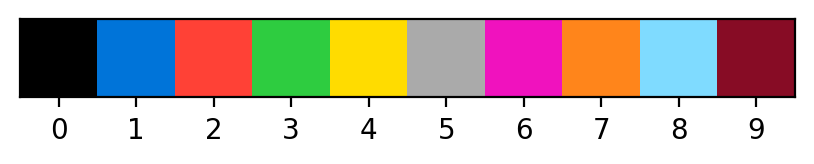

In [ ]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

In [ ]:
def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1

    plt.tight_layout()
    plt.show()


In [ ]:
def get_data(task_filename):
    with open(task_filename, 'r') as f:
        task = json.load(f)
    return task

num2color = ["black", "blue", "red", "green", "yellow", "gray", "magenta", "orange", "sky", "brown"]
color2num = {c: n for n, c in enumerate(num2color)}

In [ ]:
def check(task, pred_func):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(3, n, figsize=(4*n,12), dpi=50)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in)
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Train-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in)
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Test-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1

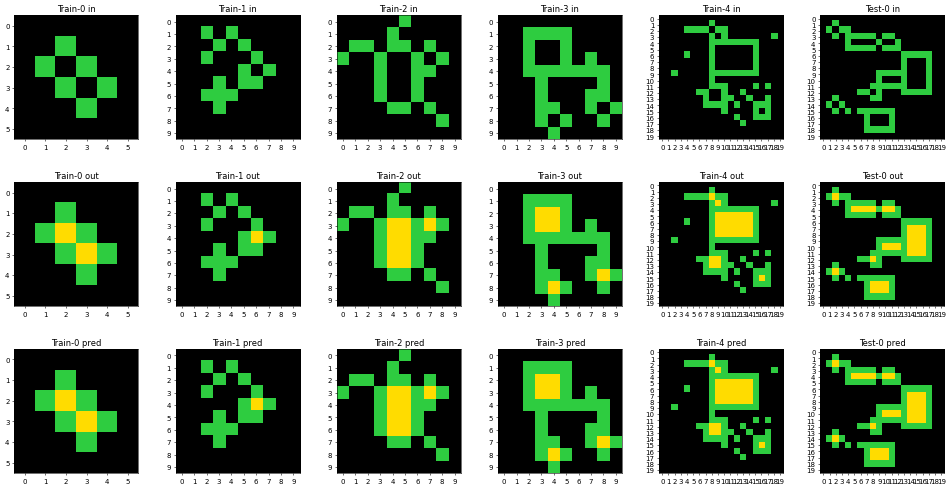

In [ ]:
def task_train001(x):
    green, yellow = color2num["green"], color2num["yellow"]

    def get_closed_area(arr):
        # depth first search
        H, W = arr.shape
        Dy = [0, -1, 0, 1]
        Dx = [1, 0, -1, 0]
        arr_padded = np.pad(arr, ((1,1),(1,1)), "constant", constant_values=0)
        searched = np.zeros(arr_padded.shape, dtype=bool)
        searched[0, 0] = True
        q = [(0, 0)]
        while q:
            y, x = q.pop()
            for dy, dx in zip(Dy, Dx):
                y_, x_ = y+dy, x+dx
                if not 0 <= y_ < H+2 or not 0 <= x_ < W+2:
                    continue
                if not searched[y_][x_] and arr_padded[y_][x_]==0:
                    q.append((y_, x_))
                    searched[y_, x_] = True
        res = searched[1:-1, 1:-1]
        res |= arr==green
        return ~res

    y = x.copy()
    y[get_closed_area(x)] = yellow
    return y

task = get_data(str(training_path / training_tasks[1]))
check(task, task_train001)

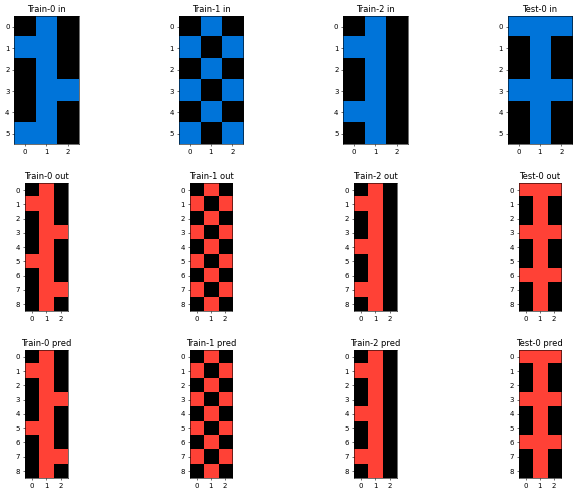

In [ ]:
def task_train002(x):
    red, blue = color2num["red"], color2num["blue"]

    def get_period_length(arr):
        H, W = arr.shape
        period = 1
        while True:
            cycled = np.pad(arr[:period, :], ((0,H-period),(0,0)), 'wrap')
            if (cycled==arr).all():
                return period
            period += 1

    def change_color(arr, d):
        res = arr.copy()
        for k, v in d.items():
            res[arr==k] = v
        return res

    period = get_period_length(x)
    y = x[:period, :]  # clop one period
    y = np.pad(y, ((0,9-period),(0,0)), 'wrap')  # cycle
    y = change_color(y, {blue: red})
    return y

task = get_data(str(training_path / training_tasks[2]))
check(task, task_train002)

In [ ]:
!pip install torch torchvision


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

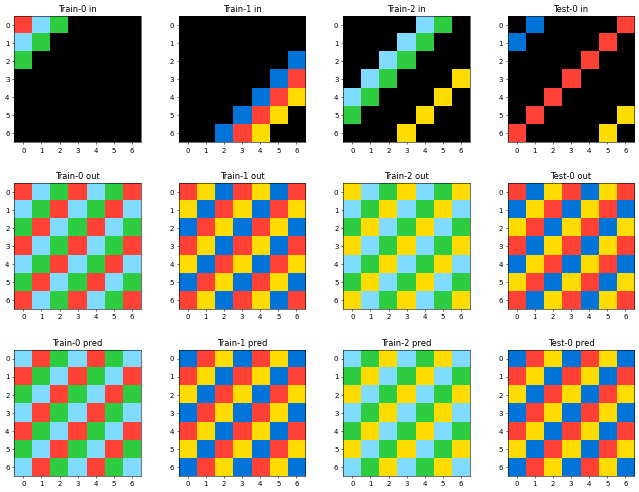

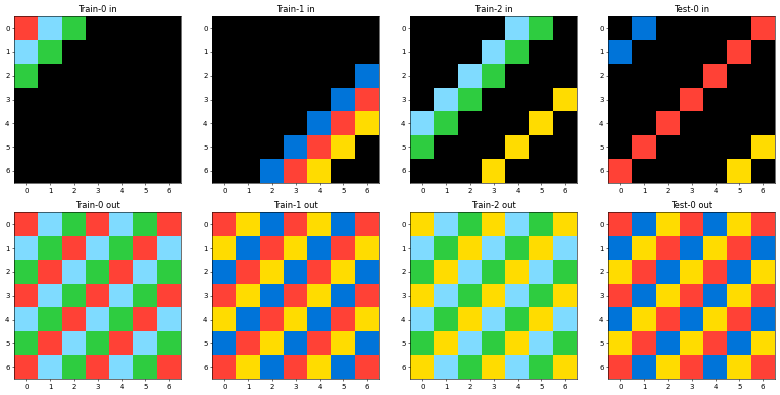

In [ ]:
def task_train006(x, colors=None):
    H, W = x.shape
    unique_colors = set()
    for yy in range(H):
        for xx in range(W):
            color = x[yy, xx]
            if color != 0:
                unique_colors.add(color)
    if colors is None:
        colors = [0] * len(unique_colors)
    for idx, color in enumerate(unique_colors):
        colors[idx % len(colors)] = color
    y = x.copy()
    for yy in range(H):
        for xx in range(W):
            y[yy, xx] = colors[(yy+xx) % len(colors)]
    return y



task = get_data(str(training_path / training_tasks[6]))
print()
check(task, task_train006)
plot_task(task)

In [ ]:
import json
import os
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

class ARCDataset(Dataset):
    def __init__(self, data_dir, transform=None, max_samples=None):
        self.task_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.json')]
        if max_samples is not None:
            self.task_files = self.task_files[:max_samples]
        self.transform = transform

    def __len__(self):
        return len(self.task_files)

    def __getitem__(self, idx):
        with open(self.task_files[idx], 'r') as f:
            task = json.load(f)
        input_matrix = task['train'][0]['input']
        output_matrix = task['train'][0]['output']
        sample = {'input': np.array(input_matrix, dtype=np.float32), 'output': np.array(output_matrix, dtype=np.float32)}

        if self.transform:
            sample = self.transform(sample)

        return sample

class ToTensor:
    def __call__(self, sample):
        input_matrix, output_matrix = sample['input'], sample['output']

        # Note: ARC tasks are single channel (grayscale), so we add a channel dimension
        input_matrix = np.expand_dims(input_matrix, axis=0)
        output_matrix = np.expand_dims(output_matrix, axis=0)

        return {'input': torch.from_numpy(input_matrix),
                'output': torch.from_numpy(output_matrix)}


class SimpleARCNet(nn.Module):
    def __init__(self):
        super(SimpleARCNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 1 * 1, 128)  # Adjusted size
        self.fc2 = nn.Linear(128, 10*10)  # Example output size (adjust as needed)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 64 * 1 * 1)  # Adjusted size
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.view(-1, 1, 10, 10)  # Adjusting the output shape
        return x

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, data in enumerate(train_loader):
        inputs, outputs = data['input'].to(device), data['output'].to(device)
        optimizer.zero_grad()
        output_pred = model(inputs)
        loss = F.mse_loss(output_pred, outputs)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(inputs)}/{len(train_loader.dataset)}'
                  f' ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

def test(model, device, test_loader):
    model.eval()
    with torch.no_grad():
        for i, data in enumerate(test_loader):
            inputs, outputs = data['input'].to(device), data['output'].to(device)
            output_pred = model(inputs)
            print(f"Test Sample {i+1}:")
            print(f"Predicted Shape: {output_pred.shape}, Actual Shape: {outputs.shape}")
            # Further evaluation code could be added here

# Setup for training and testing
train_dataset = ARCDataset(data_dir=training_path, transform=ToTensor(), max_samples=100)
test_dataset = ARCDataset(data_dir=test_path , transform=ToTensor(), max_samples=5)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleARCNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(1, 11):  # 10 epochs
    train(model, device, train_loader, optimizer, epoch)

test(model, device, test_loader)




RuntimeError: stack expects each tensor to be equal size, but got [1, 3, 9] at entry 0 and [1, 16, 10] at entry 1